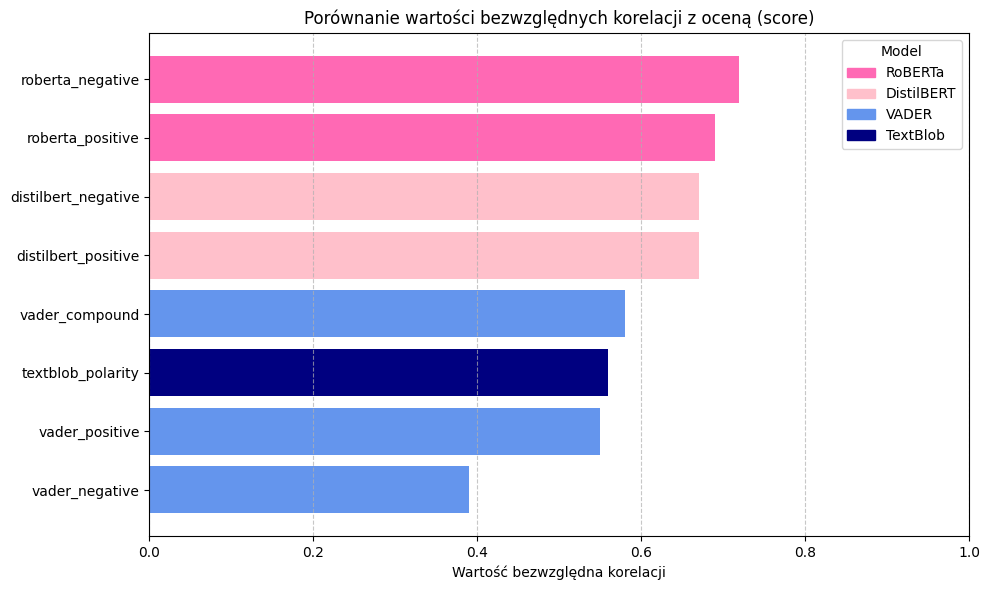

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Dane wejściowe
data = [
    {'Model': 'TextBlob',   'Variable': 'textblob_polarity',    'Correlation': 0.56},
    {'Model': 'VADER',      'Variable': 'vader_positive',       'Correlation': 0.55},
    {'Model': 'VADER',      'Variable': 'vader_negative',       'Correlation': -0.39},
    {'Model': 'VADER',      'Variable': 'vader_compound',       'Correlation': 0.58},
    {'Model': 'DistilBERT', 'Variable': 'distilbert_positive',  'Correlation': 0.67},
    {'Model': 'DistilBERT', 'Variable': 'distilbert_negative',  'Correlation': -0.67},
    {'Model': 'RoBERTa',    'Variable': 'roberta_positive',     'Correlation': 0.69},
    {'Model': 'RoBERTa',    'Variable': 'roberta_negative',     'Correlation': -0.72},
]

# Tworzymy DataFrame
df = pd.DataFrame(data)

# Dodajemy kolumnę z wartością bezwzględną korelacji
df['abs_corr'] = df['Correlation'].abs()

# Sortujemy według wartości bezwzględnej
df_sorted = df.sort_values('abs_corr')

# Definicja kolorów dla poszczególnych modeli (odcienie rozowego i granatowego)
colors = {
        'RoBERTa':      '#FF69B4',  # intensywny różowy
    'DistilBERT':   '#FFC0CB',  # jasny różowy

    'VADER': '#6495ED',  # odcień niebieskiego (cornflower blue)
    'TextBlob':    '#000080'   # granatowy
}

# colors = {
#     'DistilBERT':   '#FFC0CB',  # różowy
#     'VADER':      '#1f77b4',  # niebieski
#     'TextBlob': '#17becf',  # cyjanowy
#     'RoBERTa':    '#9467bd'   # fioletowy
# }

# Mapowanie koloru na podstawie modelu
bar_colors = df_sorted['Model'].map(colors)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted['Variable'], df_sorted['abs_corr'], color=bar_colors)
plt.xlabel('Wartość bezwzględna korelacji')
plt.title('Porównanie wartości bezwzględnych korelacji z oceną (score)')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Dodanie legendy
legend_patches = [mpatches.Patch(color=colors[model], label=model) for model in colors]
plt.legend(handles=legend_patches, title='Model')

plt.tight_layout()
plt.show()

In [30]:
sentence = 'This app is fantastic, I love the new features!'


In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(sentence)
print(vs)

{'neg': 0.0, 'neu': 0.464, 'pos': 0.536, 'compound': 0.8439}


In [1]:
from textblob import TextBlob

In [6]:
testimonial = TextBlob("This app is fantastic, I love the new features!")

In [7]:
testimonial.sentiment

Sentiment(polarity=0.35681818181818187, subjectivity=0.6515151515151515)

In [27]:
testimonial.sentiment_assessments

Sentiment(polarity=0.6416666666666667, subjectivity=0.7833333333333333, assessments=[(['love', '!'], 0.625, 0.6, None), (['great'], 0.8, 0.75, None), ([':)'], 0.5, 1.0, 'mood')])

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Step 1: Read the CSV file
df = pd.read_csv('code/reviews/combined_app_reviews.csv')

# Convert 'at' to datetime format
df['at'] = pd.to_datetime(df['at'])

# Filter for a specific month, for example, January 2022
start_date = '2022-01-01'
end_date = '2022-01-31'
mask = (df['at'] >= start_date) & (df['at'] <= end_date)
df = df.loc[mask]

# Step 2: Group the data by "app_name" and calculate the total number of comments
app_comments = df.groupby('app_name')['content'].count()

# Step 3: Find the app with the most comments
app_with_most_comments = app_comments.idxmax()

# Step 4: Filter the data for the selected app
selected_app_data = df[df['app_name'] == app_with_most_comments]

# Step 5: Perform sentiment analysis on the text data
sentiments = selected_app_data['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Step 6: Create a graph to visualize the user sentiment over time
plt.plot(selected_app_data['at'], sentiments)
plt.xlabel('Time')
plt.ylabel('Sentiment Polarity')
plt.title(f'User Sentiment Over Time for {app_with_most_comments}')
plt.xticks(rotation=45)
plt.show()

Number of rows after date filter: 0


ValueError: attempt to get argmax of an empty sequence